# Dotloss Constrained Training

This file contains code for constrained training with Dotloss

Start code

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import initializers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.models import load_model
import tensorflow as tf
import time
import keras
from math import log
print(keras.__version__)
%tensorflow_version 2.x
%matplotlib inline 
from sklearn.utils import shuffle

2.5.0


Debug

In [ ]:
%xmode Plain
%pdb on

Exception reporting mode: Plain
Automatic pdb calling has been turned ON


In [ ]:
Data

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32').reshape((x_train.shape[0], 28, 28))
x_test = x_test.astype('float32').reshape((x_test.shape[0], 28, 28))
print('x_train: ', x_train.shape)
# x_train, y_train = shuffle(x_train, y_train)

x_train /= 255
x_test /= 255

num_rows = 28
num_cols = 28
num_channels = 1
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

x_train:  (60000, 28, 28)


Add noise to test/train dataset

In [ ]:
mu = 0.15
sigma = 0.15
x_train += np.random.normal(mu, sigma, x_train.shape)
x_test += np.random.normal(mu, sigma, x_test.shape)
print(x_train.min(), x_train.max())


-0.6915779 1.8939991


Clip to 0 and 1


0.0 1.0


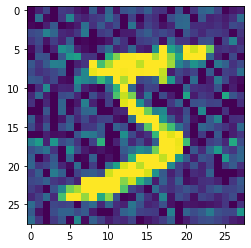

In [ ]:
x_train = np.clip(x_train, 0, 1)
x_test = np.clip(x_test, 0, 1)
print(x_train.min(), x_test.max())
plt.imshow(x_train[0].reshape(28,28))
plt.show()

Fully Connected Neural Network (BIG)

In [ ]:
# Here we define our model as a sequential neural network
def get_model():
  model = Sequential()
  model.add(Flatten(input_shape=(28, 28)))

  model.add(Dense(4096, kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(2)))
  model.add(Activation('relu'))

  model.add(Dense(4096, kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(2)))
  model.add(Activation('relu'))

  model.add(Dense(2048, kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.5)))
  model.add(Activation('relu'))

  model.add(Dense(2048, kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.5)))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1024, kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Dense(512, kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))

  model.add(Dropout(0.2))
  model.add(Dense(256, kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))

  model.add(Dropout(0.2))
  model.add(Dense(128, kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))

  model.add(Dense(num_classes))

  model.add(Activation('softmax'))

  return model

def calc_acc(model_name, data, test_set):
  preds = model_name.predict(data)
  score = 0
  for i in range(len(data)):
    pred = preds[i]
    target = test_set[i]
    if np.argmax(pred) == np.argmax(target):
      score += 1

  print("Acc:", score, 'of', len(x_test))
  return score/len(x_test)
conv = False
model = get_model()
model.summary()
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
conv = False

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 4096)              3215360   
_________________________________________________________________
activation (Activation)      (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
activation_1 (Activation)    (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
activation_2 (Activation)    (None, 2048)              0

fc_mnist model

In [ ]:
# Here we define our model as a sequential neural network
def get_model():
  model = Sequential()
  model.add(Flatten(input_shape=(28, 28)))

  model.add(Dense(512, kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))

  model.add(Dense(512, kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))

  model.add(Dense(256, kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))

  model.add(Dense(256, kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))

  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  return model

def calc_acc(model_name, data, test_set):
  preds = model_name.predict(data)
  score = 0
  for i in range(len(data)):
    pred = preds[i]
    target = test_set[i]
    if np.argmax(pred) == np.argmax(target):
      score += 1

  print("Acc:", score, 'of', len(x_test))
  return score/len(x_test)

model = get_model()
model.summary()
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0

CNN

In [ ]:
# Here we define our model as a sequential neural network

# def get_model():
#   model = Sequential()
#   model.add(Input(shape=(28, 28, 1)))
#   model.add(Conv2D(32, kernel_size=(3, 3), kernel_initializer='random_uniform',
#                       bias_initializer=initializers.Constant(0.1),
#             kernel_regularizer=custom_l2_regularizer))
#   model.add(Activation('relu'))

#   model.add(Conv2D(32, kernel_size=(3, 3), kernel_initializer='random_uniform',
#                       bias_initializer=initializers.Constant(0.1),
#             kernel_regularizer=custom_l2_regularizer))
#   model.add(Activation('relu'))

#   model.add(MaxPooling2D(pool_size=(2, 2)))
#   model.add(Flatten())

#   model.add(Dense(512, kernel_initializer='random_uniform',
#                       bias_initializer=initializers.Constant(0.1),
#             kernel_regularizer=custom_l2_regularizer))
#   model.add(Activation('relu'))
#   model.add(Dropout(0.2))

#   model.add(Dense(256, kernel_initializer='random_uniform',
#                       bias_initializer=initializers.Constant(0.1),
#                   kernel_regularizer=custom_l2_regularizer))
#   model.add(Activation('relu'))
#   model.add(Dropout(0.2))

#   model.add(Dense(10,))
#   model.add(Activation('softmax'))

#   return model

def get_model():
  model = Sequential()
  model.add(Input(shape=(28, 28, 1)))
  model.add(Conv2D(64, kernel_size=(3, 3), kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))

  model.add(Conv2D(64, kernel_size=(3, 3), kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())

  model.add(Dense(512, kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))

  model.add(Dense(256, kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))

  model.add(Dense(10,))
  model.add(Activation('softmax'))

  return model

def calc_acc(model_name, data, test_set):
  preds = model_name.predict(data)
  score = 0
  for i in range(len(data)):
    pred = preds[i]
    target = test_set[i]
    if np.argmax(pred) == np.argmax(target):
      score += 1

  print("Acc:", score, 'of', len(x_test))
  return score/len(x_test)
conv = True
model = get_model()
model.summary()
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001) # not 0.01 - too fast and can nan
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# model.compile(loss=tf.keras.losses.mean_squared_error, optimizer=optimizer, metrics=[tf.keras.metrics.MeanSquaredError()])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_44 (Activation)   (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
activation_45 (Activation)   (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 512)              

Small cnn

In [ ]:
# Here we define our model as a sequential neural network
def custom_l2_regularizer(weights):
    return tf.reduce_sum(0.02 * tf.square(weights))
# def get_model():
#   model = Sequential()
#   model.add(Input(shape=(28, 28, 1)))
#   model.add(Conv2D(32, kernel_size=(3, 3), kernel_initializer='random_uniform',
#                       bias_initializer=initializers.Constant(0.1),
#             kernel_regularizer=custom_l2_regularizer))
#   model.add(Activation('relu'))

#   model.add(Conv2D(32, kernel_size=(3, 3), kernel_initializer='random_uniform',
#                       bias_initializer=initializers.Constant(0.1),
#             kernel_regularizer=custom_l2_regularizer))
#   model.add(Activation('relu'))

#   model.add(MaxPooling2D(pool_size=(2, 2)))
#   model.add(Flatten())

#   model.add(Dense(512, kernel_initializer='random_uniform',
#                       bias_initializer=initializers.Constant(0.1),
#             kernel_regularizer=custom_l2_regularizer))
#   model.add(Activation('relu'))
#   model.add(Dropout(0.2))

#   model.add(Dense(256, kernel_initializer='random_uniform',
#                       bias_initializer=initializers.Constant(0.1),
#                   kernel_regularizer=custom_l2_regularizer))
#   model.add(Activation('relu'))
#   model.add(Dropout(0.2))

#   model.add(Dense(10,))
#   model.add(Activation('softmax'))

#   return model

def get_model():
  model = Sequential()
  model.add(Input(shape=(28, 28, 1)))
  model.add(Conv2D(8, kernel_size=(3, 3), kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())

  model.add(Dense(16, kernel_initializer='random_uniform',
                      bias_initializer=initializers.Constant(0.1)))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))

  model.add(Dense(10,))
  model.add(Activation('softmax'))

  return model

def calc_acc(model_name, data, test_set):
  preds = model_name.predict(data)
  score = 0
  for i in range(len(data)):
    pred = preds[i]
    target = test_set[i]
    if np.argmax(pred) == np.argmax(target):
      score += 1

  print("Acc:", score, 'of', len(x_test))
  return score/len(x_test)
conv = True
model = get_model()
model.summary()
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001) # not 0.01 - too fast and can nan
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# model.compile(loss=tf.keras.losses.mean_squared_error, optimizer=optimizer, metrics=[tf.keras.metrics.MeanSquaredError()])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
activation_22 (Activation)   (None, 26, 26, 8)         0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 16)                21648     
_________________________________________________________________
activation_23 (Activation)   (None, 16)                0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16)               

Regular training

In [ ]:
model.fit(x_train.reshape(60000,28,28,1), y_train, epochs=30, batch_size=16)

Epoch 1/30
3750/3750 [==============================] - 8s 2ms/step - loss: 1.2761 - accuracy: 0.5479
Epoch 2/30
3750/3750 [==============================] - 8s 2ms/step - loss: 0.6854 - accuracy: 0.7640
Epoch 3/30
3750/3750 [==============================] - 9s 2ms/step - loss: 0.5012 - accuracy: 0.8266
Epoch 4/30
3750/3750 [==============================] - 8s 2ms/step - loss: 0.4402 - accuracy: 0.8473
Epoch 5/30
3750/3750 [==============================] - 9s 2ms/step - loss: 0.4081 - accuracy: 0.8669
Epoch 6/30
3750/3750 [==============================] - 9s 2ms/step - loss: 0.3772 - accuracy: 0.8762
Epoch 7/30
3750/3750 [==============================] - 8s 2ms/step - loss: 0.3551 - accuracy: 0.8824
Epoch 8/30
3750/3750 [==============================] - 8s 2ms/step - loss: 0.3387 - accuracy: 0.8877
Epoch 9/30
3750/3750 [==============================] - 8s 2ms/step - loss: 0.3301 - accuracy: 0.8886
Epoch 10/30
3750/3750 [==============================] - 9s 2ms/step - loss: 0.294

Load a previously trained model and report its accuracy

In [ ]:
model = load_model("latest_model_3_a=90.h5") 
model.summary()
calc_acc(model, x_test, y_test)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_60 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_61 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 32)                16416     
_________________________________________________________________
activation_62 (Activation)   (None, 32)              

0.7325


Training loop for constrained network

This code trains

1.   Calculate prediction loss
2.   Retrieve intermediate neuron activity of target layer
3.   Calculate gradient of target layer w.r.t input
4.   For each neuron compute v from ICD
5.   For each v calculate neuron distraction score according to input mask
6.   Minimise loss as pred + mask_score



Tf Function Version

In [ ]:
# changed to function to use tf.function to make it faster
# how many output neurons there are in the target layer, used to visualise gradients etc.

@tf.function
def relu(x, x_intercept=0, positive=True):
  if positive:
    return x * (x > x_intercept)
  else:
    return x * (x < x_intercept)
# model = get_model()
# model.summary()
# # conv = True # whether or not we are using convnet

# optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4)
# model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# model.fit(x_train.reshape(60000,28,28,1), y_train, epochs=3, batch_size=32)
# optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001) # not 0.01 - too fast and can nan
# model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# conv = False # True
model_losses = []
acc_losses = []
w_losses = []
c_losses = []
v_losses = []
joint_losses = []
dot_losses = []
# parameters
# interpretability mask term
alpha = 1.0
alpha = tf.convert_to_tensor(alpha, dtype=tf.float32)
conv = False
if conv:
  target_layer = len(model.layers)-1
else:
  target_layer = len(model.layers)-1
n_neurons = model.layers[target_layer].output.shape[-1]
print("Looking at", n_neurons, "neurons in layer", target_layer, model.layers[target_layer].name)
# define a model that lets us get at the internal activations
aux_model = tf.keras.Model(inputs=model.inputs,
                           outputs=[model.layers[target_layer].output[:, i] for i in range(n_neurons)])
start_time = time.time()
# define training step
@tf.function
def step(X, y, batch_size, model, aux_model, target_layer, target_neurons):
  """
  x_batch: input images
  y_batch: correct labels
  batch_size: can be inferred from x_batch
  model: the predicting model to train
  aux_model: the extra model that outputs the target layer of model
  target_layer: which layer to examine
  neuron_mode: target all neurons in the layer or just class neuron (if output layer)
  """
 
  def tf_relu(data, intercept=tf.constant(0.0), positive=True):
    if positive:
      return tf.math.multiply(data, tf.cast(tf.math.greater(data, intercept), tf.float32))
    else:
      return tf.math.multiply(data, tf.cast(tf.math.less(data, intercept), tf.float32))
  with tf.GradientTape(persistent=True) as tape:
    # get predictions and calculate acc loss for the batch
    preds = model(X)
    losses = tf.keras.losses.categorical_crossentropy(y, preds)

    # Get internal activations from aux model
    # x = tf.convert_to_tensor(X, dtype=tf.float32)
    if conv:
      x = tf.reshape(X, (batch_size, 28, 28, 1))
    else:
      x = tf.reshape(X, (batch_size, 28, 28))
    with tf.GradientTape(persistent=True) as aux_tape:
      # this is activations at target_layer
      aux_tape.watch(x)
      neuron_activations = aux_model(x)  # eq 1

    # compute gradients w.r.t from neurons in target layer
    # a bit of wasted computation here as all neuron gradients in the layer are
    # calculated even if we don't use them all...
    grad_maps = []
    for neuron in neuron_activations:
      # local grad maps are (28, 28) images to input
      grad_maps.append(aux_tape.gradient(neuron, x))
    grad_maps = tf.reshape(grad_maps, (batch_size, n_neurons, 784))
    X = tf.reshape(x, (batch_size, 784,))
    neuron_activations = tf.reshape(neuron_activations, (batch_size, n_neurons))

    w_scale_losses = []
    c_scale_losses = []
    v_scale_losses = []
    dot_losses = []
    joint_losses = []
    wxwc_losses = []
    # Caclulate v from neuron-input gradients
    for batch in range(batch_size):
      x = X[batch]
      # which output neuron to use
      target_neuron = target_neurons[batch]
      w_hat = tf.reshape(grad_maps[batch][target_neuron], (784,))  # eq 4
      b_hat = tf.math.subtract(neuron_activations[batch][target_neuron], tf.multiply(x[batch], tf.transpose(w_hat)))  # eq 5
      v = tf.math.add(tf.multiply(w_hat, x[batch]), b_hat)  # eq 2
      # c_hat = tf.math.subtract(x[batch], tf.tensordot(tf.math.divide(v , (tf.tensordot(w_hat, tf.transpose(w_hat), axes=1))), w_hat, axes=1))  # CHECK AXES is 1 for both
      # print('v * w_hat')
      # print(v.shape)
      # print(w_hat.shape)
      # print(tf.math.multiply(v, w_hat))
      # print('vw / stop norm w_hat')
      # vw = tf.math.multiply(v, w_hat)
      # print('top', vw)
      # print('bot', tf.linalg.normalize(w_hat, axis=1))
      # print(tf.math.divide(vw, tf.stop_gradient(tf.linalg.normalize(w_hat))))
      # print('x  - ...')
      # print(tf.math.subtract(x[batch], tf.math.divide(tf.math.multiply(v, w_hat), tf.stop_gradient(tf.linalg.normalize(w_hat)))))
      c_hat = tf.math.subtract(x[batch], tf.math.divide(tf.math.multiply(v, w_hat), tf.clip_by_value(tf.stop_gradient(tf.linalg.normalize(w_hat)[0]), 1e-8, 1e8)))  # CHECK AXES is 1 for both
      # print('chat', c_hat.shape)
      v_hat = tf.math.multiply(tf.math.subtract(x[batch], c_hat), w_hat)  # eq 8
      # print('vhat', v_hat.shape)

      v = tf.transpose(v_hat)
      # we have v = w(x-c)
      # 1. every element component of w and c is between 0 and 1
      w_scale_loss_neg = tf.reduce_sum(tf.abs(tf_relu(w_hat, intercept=tf.constant(0.0), positive=False)))
      w_scale_loss_pos = tf.reduce_sum(tf.abs(tf_relu(w_hat, intercept=tf.constant(1.0), positive=True)))
      w_scale_loss = tf.math.square(tf.add(w_scale_loss_neg, w_scale_loss_pos))

      c_scale_loss_neg = tf.reduce_sum(tf.abs(tf_relu(c_hat, intercept=tf.constant(0.0), positive=False)))
      c_scale_loss_pos = tf.reduce_sum(tf.abs(tf_relu(c_hat, intercept=tf.constant(1.0), positive=True)))
      c_scale_loss = tf.add(c_scale_loss_neg, c_scale_loss_pos)

      v_scale_loss_neg = tf.reduce_sum(tf.abs(tf_relu(v_hat, intercept=tf.constant(0.0), positive=False)))
      v_scale_loss_pos = tf.reduce_sum(tf.abs(tf_relu(v_hat, intercept=tf.constant(1.0), positive=True)))
      v_scale_loss = tf.math.abs(tf.add(v_scale_loss_neg, v_scale_loss_pos))

      w_scale_losses.append(w_scale_loss)
      c_scale_losses.append(c_scale_loss)
      v_scale_losses.append(v_scale_loss)
      # 2. the dot product of w and c is zero.
      dot_loss = tf.math.abs(tf.tensordot(w_hat, c_hat, axes=0))
      dot_losses.append(dot_loss)


      # wx wc dot
      wxwc_dot_loss = tf.math.abs(tf.tensordot(tf.multiply(w_hat, x), tf.multiply(w_hat, c_hat), axes=0))
      wxwc_losses.append(wxwc_dot_loss)
      # print(wxwc_dot_loss, 'wxwc_dot_loss')
      # 3. w+c = x
      joint_loss = tf.math.abs(tf.math.subtract(x, tf.math.add(w_hat, c_hat)))
      joint_losses.append(joint_loss)
      # acc loss
      loss = tf.math.reduce_mean(losses)
      # constraint losses
      w_scale_loss = tf.math.reduce_mean(w_scale_losses)
      c_scale_loss = tf.math.reduce_mean(c_scale_losses)
      v_scale_loss = tf.math.reduce_mean(v_scale_losses)
      dot_loss = tf.math.reduce_mean(dot_losses)
      joint_loss = tf.math.reduce_mean(joint_losses)
      wxwc_dot_loss = tf.math.reduce_mean(wxwc_losses)

      # overall loss to train on
      # model_loss = tf.reduce_sum([loss, w_scale_loss, c_scale_loss, dot_loss, joint_loss])
      # end tape
      model_losses = [tf.multiply(tf.constant(1.0),loss), 
                      tf.multiply(tf.constant(0.0),w_scale_loss), 
                      tf.multiply(tf.constant(0.0),c_scale_loss), 
                      tf.multiply(tf.constant(0.0),v_scale_loss), 
                      tf.multiply(tf.constant(1.0),dot_loss), 
                      tf.multiply(tf.constant(0.0),joint_loss),
                      tf.multiply(tf.constant(0.0),wxwc_dot_loss)
                      ]
      # model_losses = [tf.multiply(tf.constant(10.0),loss), 
      #                 tf.multiply(tf.constant(1.0),w_scale_loss), 
      #                 tf.multiply(tf.constant(0.5),c_scale_loss), 
      #                 tf.multiply(tf.constant(0.0),v_scale_loss), 
      #                 tf.multiply(tf.constant(1.0),dot_loss), 
      #                 tf.multiply(tf.constant(0.05),joint_loss)]
      model_loss= tf.reduce_sum(model_losses)

  # learn
  grads = tape.gradient(model_loss, model.trainable_variables)
  optimizer.apply_gradients(zip(grads, model.trainable_variables))
  return loss, model_losses


# training loop
batch_size = 64
n_batches = 60000//64
max_images = batch_size * n_batches
epochs = 5
for e in range(epochs):
  for i in range(0, max_images, batch_size):
    # training stats
    print("Epoch", e, 'of', str(epochs-1), "Batch", str(i / batch_size), 'of', str(max_images / batch_size))
    elapsed_time = time.time() - start_time
    elapsed_time_str = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
    progress = i / max_images * 100
    total_time_estimated = elapsed_time / (i + 1 + e * i) * (max_images * epochs+ 1) 
    

    # Start training batch
    if conv:
      x = x_train[i:i + batch_size].reshape(batch_size, 28, 28, 1)
    else:
      x = x_train[i:i + batch_size].reshape(batch_size, 28, 28)
    y = y_train[i:i + batch_size]
    target_neurons = np.argmax(y, axis=1)
    X = tf.convert_to_tensor(x, dtype=tf.float32)
    Y = tf.convert_to_tensor(y, dtype=tf.float32)
    # call function
    # step(x, y, model, aux_model, target_layer)
    loss, model_loss = step(X, Y, batch_size, model, aux_model, target_layer, target_neurons)

    loss, w_scale_loss, c_scale_loss, v_scale_loss, dot_loss, joint_loss, wxwc_dot_loss = model_loss
    print('loss', loss)
    print('w_scale_loss', w_scale_loss)
    print('c_scale_loss', c_scale_loss)
    print('v_scale_loss', v_scale_loss)

    print('dot_loss', dot_loss)
    print('joint_loss', joint_loss)
    print('wxwc_dot_loss', wxwc_dot_loss)
    # report
    print("Time: ", elapsed_time_str, 'out of estimated:', time.strftime("%H:%M:%S", time.gmtime(total_time_estimated)),
      'time remaining:', str(time.strftime("%H:%M:%S", time.gmtime(total_time_estimated - elapsed_time))))
    print('Model loss:', model_loss)
    print('Acc loss:', loss)
    calc_acc(model, x_test.reshape(10000, 28, 28, 1), y_test)
    print()
    model_losses.append(model_loss + loss)  # sum(model_loss)/len(model_loss))
    # neg_losses.append(model_loss)
    acc_losses.append(loss)
    w_losses.append(w_scale_loss)
    c_losses.append(c_scale_loss)
    v_losses.append(v_scale_loss)
    dot_losses.append(dot_loss)
    joint_losses.append(joint_loss)
    

  # save and report sometimes
  # if i / batch_size % 100 == 0 and i / batch_size > 100:
    # plot batch v's
    # V = np.array(V).reshape(batch_size, n_neurons, 28, 28) # layer of neurons
    # V2 = np.array(V).reshape(batch_size, 28, 28) # single neuron
    # for v in V2:
    #   # v = np.array(v).reshape(28, 28)
    #   v /= np.max(np.abs(v))
    # f, axarr = plt.subplots(8, 4, figsize=(10, 10))
    # for i in range(batch_size):
    #   axarr[i % 8, i // 8].imshow(V2[i], cmap='seismic') # single neuron
    #   # axarr[i % 8, i // 8].imshow(V[i][0], cmap='seismic') # layer
    # plt.show()
    
  # filename = str(e) + '_batch_' + str(i/batch_size) + '.h5'
  filename = str(e) + '_batch.h5'
  special = 'dot_cw_2'
  filename = special + filename
  model.save(filename) 
if conv:
  calc_acc(model, x_test.reshape(10000, 28, 28, 1), y_test)
else:
  calc_acc(model, x_test.reshape(10000, 28, 28), y_test)
model_losses, acc_losses = np.array(model_losses), np.array(acc_losses)
filename = 'latest_model.h5'
model.save(filename)
# V = np.array(V).reshape(batch_size, 28, 28) # single neuron
# for v in V:
#   # v = np.array(v).reshape(28, 28)
#   v /= np.max(np.abs(v))
# f, axarr = plt.subplots(8, 4, figsize=(10, 10))
# for i in range(batch_size):
#   axarr[i % 8, i // 8].imshow(V[i], cmap='seismic') # single neuron
#   # axarr[i % 8, i // 8].imshow(V[i][0], cmap='seismic') # layer
# plt.show()


Streaming output truncated to the last 5000 lines.
joint_loss tf.Tensor(0.0, shape=(), dtype=float32)
wxwc_dot_loss tf.Tensor(0.0, shape=(), dtype=float32)
Time:  00:44:13 out of estimated: 01:15:03 time remaining: 00:30:50
Model loss: [<tf.Tensor: shape=(), dtype=float32, numpy=1.8538067>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0>, <tf.Tensor: shape=(), dtype=float32, numpy=0.123887844>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0>]
Acc loss: tf.Tensor(1.8538067, shape=(), dtype=float32)
Acc: 5453 of 10000

Epoch 4 of 4 Batch 553.0 of 937.0
loss tf.Tensor(1.9442914, shape=(), dtype=float32)
w_scale_loss tf.Tensor(0.0, shape=(), dtype=float32)
c_scale_loss tf.Tensor(0.0, shape=(), dtype=float32)
v_scale_loss tf.Tensor(0.0, shape=(), dtype=float32)
dot_loss tf.Tensor(0.15550375, shape=(), dtype=float32)
joint_loss tf.Tensor(0.0, shap

Save model

In [ ]:
model.save("fc_dotloss_e1.h5")

# Interpretability with SLP

In [ ]:
# model.fit(x_train, y_train, epochs=10, verbose=1, batch_size=64)
def tf_relu(data, intercept=tf.constant(0.0), positive=True):
    if positive:
      return tf.math.multiply(data, tf.cast(tf.math.greater(data, intercept), tf.float32))
    else:
      return tf.math.multiply(data, tf.cast(tf.math.less(data, intercept), tf.float32))
def perform_SVD(X, model, target_layer, aux_model):
    # print(x.shape, x)
    # print(model.input.shape)
    # print('modelpred:', model.predict(x))
    X = tf.convert_to_tensor(X)
    # print(x)
    # print('tesnorpred:', model.predict(x))

    img_rows = 28
    img_cols = 28

    # feed in images and record activations
    # print("Retrieving Neuron Activations")
    with tf.GradientTape(persistent=True) as tape:
        # track the input to see how it changes
        tape.watch(X)
        # retrieve output prediction and hidden layer we specified in aux_model
        neuron_activations = aux_model(X)  # eq 1

    # neuron activations shape is (batch_size, neuron_size)
    # print(np.argmax(model.predict(x)), 'was the predicted class')
    # calculate gradients for each neuron w.r.t. input
    grad_maps = []
    print("Retrieving neuron gradients w.r.t. input")

    for neuron in neuron_activations:
        # local grad maps are (28, 28) images
        grad_maps.append(tape.gradient(neuron,X))

    grad_maps = np.array(grad_maps)
    print("Calculated grad_maps of shape:", grad_maps.shape)


    # numpyify the gradients and reshape tensors to get reduce unneeded dimensions
    grad_maps = grad_maps.reshape(len(X), n_neurons, img_rows * img_cols * 1)
    X = X.numpy().reshape(len(X), (img_rows * img_cols * 1))

    neuron_activations = np.array(neuron_activations).reshape(len(X), n_neurons, )

    V_batch = []
    for i in range(len(X)):
      x = X[i]
      # compute w_hat, b_hat and V
      V = []
      for neuron in range(n_neurons):
          # switched weight vector
          w_hat = grad_maps[i][neuron]  # eq 4
          # switched bias vector
          b_hat = neuron_activations[i][neuron] - x * np.transpose(w_hat)  # eq 5

          v = w_hat * x + b_hat  # eq 2
          # note that this is equal to the neuron activation here but as a (28, 28) matrix?
          # v is a (28, 28) shape but almost all same value
          # ICD
          # many values are -inf or nan here?
          c_hat = x - np.dot(v / (np.dot(w_hat, np.transpose(w_hat))), w_hat)  # eq 9
          c_hat = np.nan_to_num(c_hat)
          v_hat = (x - c_hat) * w_hat  # eq 8

          # V.append(np.transpose(-c_hat*w_hat))  # eq 11
          # local_V.append(np.transpose(x*w_hat))
          V.append(np.transpose(v_hat))  # eq 11
      V_batch.append(V)

    # now we have calculated switched weight vectors for each neuron
    V = np.array(V_batch)
    V = V.transpose()
    #V -= np.mean(V)
    print('V shape after transpose before svd', V.shape)
    V = V.reshape(len(X), 784, n_neurons)
    u = []
    s = []
    vh = []
    for i in range(len(X)):
      print("Performing SVD", i, 'of', len(X))
      u1, s1, vh1 = np.linalg.svd(V[i], full_matrices=False)  # eq 12
      u.append(u1)
      s.append(s1)
      vh.append(vh1)
    
    u = np.array(u)
    s = np.array(s)
    vh = np.array(vh)
    print('U shape before returning', u.shape)
    print(u.shape, s.shape, vh.shape)
    
    return u, s, vh

Plotting some losses

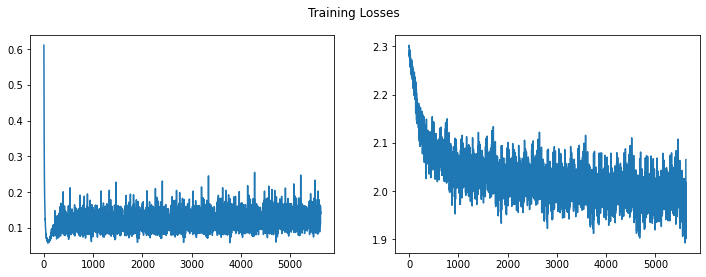

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Training Losses')
ax1.plot(dot_losses)
ax2.plot(acc_losses)

SLP interpretations

Retrieving neuron gradients w.r.t. input
Calculated grad_maps of shape: (10, 1, 28, 28, 1)
V shape after transpose before svd (784, 10, 1)
Performing SVD 0 of 1
U shape before returning (1, 784, 10)
(1, 784, 10) (1, 10) (1, 10, 10)
U shape before transpose: (1, 784, 10)
U shape after transpose (10, 784, 1)
s shape (1, 10)
Retrieving neuron gradients w.r.t. input
Calculated grad_maps of shape: (10, 1, 28, 28, 1)
V shape after transpose before svd (784, 10, 1)
Performing SVD 0 of 1
U shape before returning (1, 784, 10)
(1, 784, 10) (1, 10) (1, 10, 10)
U shape before transpose: (1, 784, 10)
U shape after transpose (10, 784, 1)
s shape (1, 10)
Retrieving neuron gradients w.r.t. input
Calculated grad_maps of shape: (10, 1, 28, 28, 1)
V shape after transpose before svd (784, 10, 1)
Performing SVD 0 of 1
U shape before returning (1, 784, 10)
(1, 784, 10) (1, 10) (1, 10, 10)
U shape before transpose: (1, 784, 10)
U shape after transpose (10, 784, 1)
s shape (1, 10)
Retrieving neuron gradients 

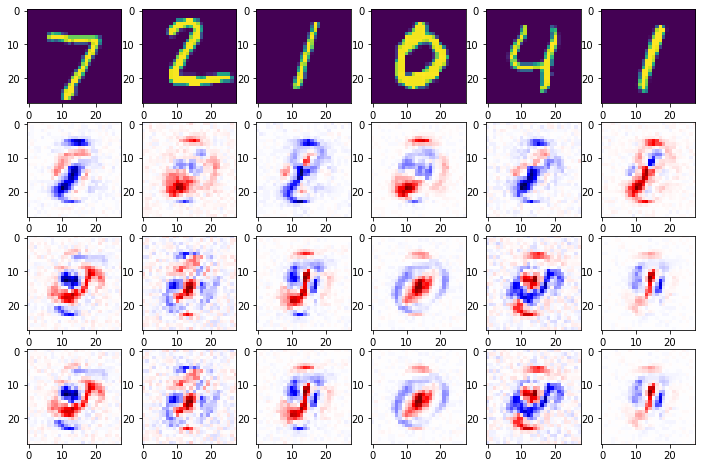

In [ ]:
from tensorflow.keras.models import load_model
# model = load_model('training_mask_2500_images_a=0.6169.h5')
# compare activation similarity
conv = False
def get_activations(X, model, target_layer, aux_model):
    X = tf.convert_to_tensor(X)
 
    # feed in images and record activations
    print("Retrieving Neuron Activations")
    with tf.GradientTape(persistent=True) as tape:
        # track the input to see how it changes
        tape.watch(X)
        # retrieve output prediction and hidden layer we specified in aux_model
        neuron_activations = aux_model(X)  # eq 1

    neuron_activations = np.array(neuron_activations).reshape(len(X), n_neurons, )

    return neuron_activations

# calc_acc(model, x_test)

# model_normal = get_model()
# optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
# model_normal.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# n = 60000
# model_normal.fit(x_train.reshape(60000, 28, 28, 1), y_train, epochs=1)
# calc_acc(model_normal, x_test.reshape(10000, 28, 28, 1), y_test)
#img = add_noise(img)
batch_size = 1
target_layer = len(model.layers) - 1# 9
n_neurons = model.layers[target_layer].output.shape[-1]
# define a model that lets us get at the internal activations
aux_model = tf.keras.Model(inputs=model.inputs,
                            outputs=[model.layers[target_layer].output[:, i] for i in range(n_neurons)])



# print('u shape', u.shape)
f, axarr = plt.subplots(4, 6, figsize=(12, 8))
for i in range(6):
  img = x_test[i:i+1].reshape(1, 28, 28, 1)
  # print("pred'", np.argmax(model(img)))
  target_neurons = np.argmax(y_test[i:i+1], axis=1)
  # img = img.reshape(1, 784)
  with tf.GradientTape(persistent=True) as tape:
    # get predictions and calculate acc loss for the batch
    X = img
    batch_size = 1
    preds = model(X)

    # Get internal activations from aux model
    # x = tf.convert_to_tensor(X, dtype=tf.float32)
    if conv:
      x = tf.reshape(X, (batch_size, 28, 28, 1))
    else:
      x = tf.reshape(X, (batch_size, 28, 28))
    with tf.GradientTape(persistent=True) as aux_tape:
      # this is activations at target_layer
      aux_tape.watch(x)
      neuron_activations = aux_model(x)  # eq 1

    # compute gradients w.r.t from neurons in target layer
    # a bit of wasted computation here as all neuron gradients in the layer are
    # calculated even if we don't use them all...
    grad_maps = []
    for neuron in neuron_activations:
      # local grad maps are (28, 28) images to input
      grad_maps.append(aux_tape.gradient(neuron, x))
    grad_maps = tf.reshape(grad_maps, (batch_size, n_neurons, 784))
    x = tf.reshape(x, (batch_size, 784,))
    neuron_activations = tf.reshape(neuron_activations, (batch_size, n_neurons))


    w_scale_losses = []
    c_scale_losses = []
    dot_losses = []
    joint_losses = []
    # Caclulate v from neuron-input gradients
    for batch in range(batch_size):
      # which output neuron to use
      target_neuron = target_neurons[batch]
      w_hat = tf.reshape(grad_maps[batch][target_neuron], (784,))  # eq 4
      b_hat = tf.math.subtract(neuron_activations[batch][target_neuron], tf.multiply(x[batch], tf.transpose(w_hat)))  # eq 5
      v = tf.math.add(tf.multiply(w_hat, x[batch]), b_hat)  # eq 2
      c_hat = tf.math.subtract(x[batch], tf.tensordot(v / (tf.tensordot(w_hat, tf.transpose(w_hat), axes=1)), w_hat, axes=1))  # CHECK AXES is 1 for both
      v_hat = tf.math.multiply(tf.math.subtract(x[batch], c_hat), w_hat)  # eq 8
      v = tf.transpose(v_hat)

      # # we have v = w(x-c)
      # # 1. every element component of w and c is between 0 and 1
      # w_scale_loss_neg = tf.reduce_sum(tf.abs(tf_relu(w_hat, intercept=tf.constant(0.0), positive=False)))
      # w_scale_loss_pos = tf.reduce_sum(tf.abs(tf_relu(w_hat, intercept=tf.constant(1.0), positive=True)))
      # w_scale_loss = tf.add(w_scale_loss_neg, w_scale_loss_pos)

      # c_scale_loss_neg = tf.reduce_sum(tf.abs(tf_relu(c_hat, intercept=tf.constant(0.0), positive=False)))
      # c_scale_loss_pos = tf.reduce_sum(tf.abs(tf_relu(c_hat, intercept=tf.constant(1.0), positive=True)))
      # c_scale_loss = tf.add(c_scale_loss_neg, c_scale_loss_pos)
      # w_scale_losses.append(w_scale_loss)
      # c_scale_losses.append(c_scale_loss)
      # # 2. the dot product of w and c is zero.
      # dot_loss = tf.tensordot(w_hat, c_hat, axes=1)
      # dot_losses.append(dot_loss)
      # # 3. w+c = x
      # joint_loss = tf.math.subtract(x, tf.math.add(w_hat, c_hat))
      # joint_losses.append(joint_loss)
      # # acc loss
      # # loss = tf.math.reduce_sum(losses) / len(losses) #tf.math.reduce_mean(losses)
      # # constraint losses
      # w_scale_loss = tf.math.reduce_mean(w_scale_losses)
      # c_scale_loss = tf.math.reduce_mean(c_scale_losses)
      # dot_loss = tf.math.reduce_mean(dot_losses)
      # joint_loss = tf.math.reduce_mean(joint_losses)

  u, s, vh = perform_SVD(img, model, target_layer, aux_model)
  print('U shape before transpose:', u.shape)
  u = u.transpose()
  print('U shape after transpose', u.shape)
  print('s shape', s.shape)
  u = u.transpose()
  # for component in u:
  #   component /=(np.max(np.abs(component)))
  u = u[0]
  u = u.transpose()
  w = w_hat.numpy()
  c = c_hat.numpy()
  for component in u:
    component /= np.max(np.abs(component))
  axarr[0, i].imshow(img.reshape(28, 28))
  axarr[1, i].imshow(u[0].reshape(28, 28), cmap='seismic', vmin=-1, vmax=1)
  axarr[2, i].imshow(u[1].reshape(28, 28), cmap='seismic', vmin=-1, vmax=1)
  axarr[3, i].imshow(u[1].reshape(28, 28), cmap='seismic', vmin=-1, vmax=1)

  # axarr[1, i].imshow(v.numpy().reshape(28, 28), vmin=0, vmax=1, cmap='seismic')
  # axarr[2, i].imshow(c_hat.numpy().reshape(28, 28))
  # axarr[3, i].imshow(w_hat.numpy().reshape(28, 28))# single neuron
  # wc = w.reshape(28, 28) * c.reshape(28, 28)
  # wx = w.reshape(28, 28) * x.numpy().reshape(28, 28)
  # axarr[4, i].imshow(wc, vmin=-1, vmax=1, cmap='seismic')
  # axarr[5, i].imshow(wx, cmap='seismic')
  # axarr[5, i].imshow(u[3].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic')

  # axarr[i % 8, i // 8].imshow(V[i][0], cmap='seismic') # layer
plt.show()



Visualising some internal components

Retrieving neuron gradients w.r.t. input
Calculated grad_maps of shape: (10, 1, 28, 28, 1)
V shape after transpose before svd (784, 10, 1)
Performing SVD 0 of 1
U shape before returning (1, 784, 10)
(1, 784, 10) (1, 10) (1, 10, 10)
U shape before transpose: (1, 784, 10)
U shape after transpose (10, 784, 1)
s shape (1, 10)
input, v, w, c, wc, wx
Retrieving neuron gradients w.r.t. input
Calculated grad_maps of shape: (10, 1, 28, 28, 1)
V shape after transpose before svd (784, 10, 1)
Performing SVD 0 of 1
U shape before returning (1, 784, 10)
(1, 784, 10) (1, 10) (1, 10, 10)
U shape before transpose: (1, 784, 10)
U shape after transpose (10, 784, 1)
s shape (1, 10)
input, v, w, c, wc, wx
Retrieving neuron gradients w.r.t. input
Calculated grad_maps of shape: (10, 1, 28, 28, 1)
V shape after transpose before svd (784, 10, 1)
Performing SVD 0 of 1
U shape before returning (1, 784, 10)
(1, 784, 10) (1, 10) (1, 10, 10)
U shape before transpose: (1, 784, 10)
U shape after transpose (10, 784, 1

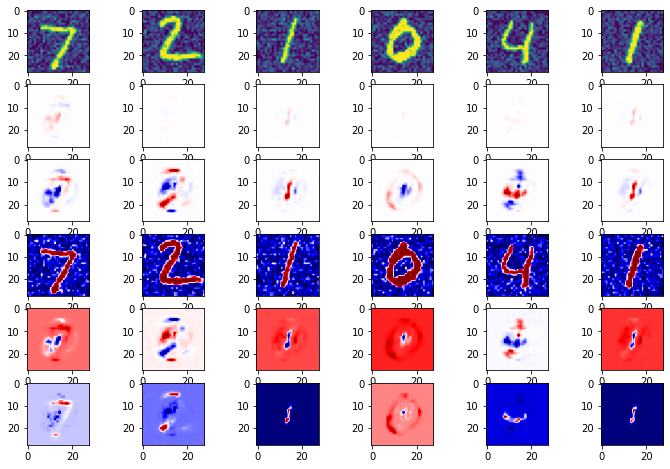

In [ ]:
# this is for the internal components
from tensorflow.keras.models import load_model
# model = load_model('training_mask_2500_images_a=0.6169.h5')
# compare activation similarity
conv = False
def get_activations(X, model, target_layer, aux_model):
    X = tf.convert_to_tensor(X)
 
    # feed in images and record activations
    print("Retrieving Neuron Activations")
    with tf.GradientTape(persistent=True) as tape:
        # track the input to see how it changes
        tape.watch(X)
        # retrieve output prediction and hidden layer we specified in aux_model
        neuron_activations = aux_model(X)  # eq 1

    neuron_activations = np.array(neuron_activations).reshape(len(X), n_neurons, )

    return neuron_activations

# calc_acc(model, x_test)

# model_normal = get_model()
# optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
# model_normal.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# n = 60000
# model_normal.fit(x_train.reshape(60000, 28, 28, 1), y_train, epochs=1)
# calc_acc(model_normal, x_test.reshape(10000, 28, 28, 1), y_test)
#img = add_noise(img)
batch_size = 1
target_layer = len(model.layers) - 1# 9
n_neurons = model.layers[target_layer].output.shape[-1]
# define a model that lets us get at the internal activations
aux_model = tf.keras.Model(inputs=model.inputs,
                            outputs=[model.layers[target_layer].output[:, i] for i in range(n_neurons)])



# print('u shape', u.shape)
f, axarr = plt.subplots(6, 6, figsize=(12, 8))
for i in range(6):
  img = x_test[i:i+1].reshape(1, 28, 28, 1)
  # print("pred'", np.argmax(model(img)))
  target_neurons = np.argmax(y_test[i:i+1], axis=1)
  # img = img.reshape(1, 784)
  with tf.GradientTape(persistent=True) as tape:
    # get predictions and calculate acc loss for the batch
    X = img
    batch_size = 1
    preds = model(X)

    # Get internal activations from aux model
    # x = tf.convert_to_tensor(X, dtype=tf.float32)
    if conv:
      x = tf.reshape(X, (batch_size, 28, 28, 1))
    else:
      x = tf.reshape(X, (batch_size, 28, 28))
    with tf.GradientTape(persistent=True) as aux_tape:
      # this is activations at target_layer
      aux_tape.watch(x)
      neuron_activations = aux_model(x)  # eq 1

    # compute gradients w.r.t from neurons in target layer
    # a bit of wasted computation here as all neuron gradients in the layer are
    # calculated even if we don't use them all...
    grad_maps = []
    for neuron in neuron_activations:
      # local grad maps are (28, 28) images to input
      grad_maps.append(aux_tape.gradient(neuron, x))
    grad_maps = tf.reshape(grad_maps, (batch_size, n_neurons, 784))
    x = tf.reshape(x, (batch_size, 784,))
    neuron_activations = tf.reshape(neuron_activations, (batch_size, n_neurons))


    w_scale_losses = []
    c_scale_losses = []
    dot_losses = []
    joint_losses = []
    # Caclulate v from neuron-input gradients
    for batch in range(batch_size):
      # which output neuron to use
      target_neuron = target_neurons[batch]
      w_hat = tf.reshape(grad_maps[batch][target_neuron], (784,))  # eq 4
      b_hat = tf.math.subtract(neuron_activations[batch][target_neuron], tf.multiply(x[batch], tf.transpose(w_hat)))  # eq 5
      v = tf.math.add(tf.multiply(w_hat, x[batch]), b_hat)  # eq 2
      c_hat = tf.math.subtract(x[batch], tf.tensordot(v / (tf.tensordot(w_hat, tf.transpose(w_hat), axes=1)), w_hat, axes=1))  # CHECK AXES is 1 for both
      v_hat = tf.math.multiply(tf.math.subtract(x[batch], c_hat), w_hat)  # eq 8
      v = tf.transpose(v_hat)

      # # we have v = w(x-c)
      # # 1. every element component of w and c is between 0 and 1
      # w_scale_loss_neg = tf.reduce_sum(tf.abs(tf_relu(w_hat, intercept=tf.constant(0.0), positive=False)))
      # w_scale_loss_pos = tf.reduce_sum(tf.abs(tf_relu(w_hat, intercept=tf.constant(1.0), positive=True)))
      # w_scale_loss = tf.add(w_scale_loss_neg, w_scale_loss_pos)

      # c_scale_loss_neg = tf.reduce_sum(tf.abs(tf_relu(c_hat, intercept=tf.constant(0.0), positive=False)))
      # c_scale_loss_pos = tf.reduce_sum(tf.abs(tf_relu(c_hat, intercept=tf.constant(1.0), positive=True)))
      # c_scale_loss = tf.add(c_scale_loss_neg, c_scale_loss_pos)
      # w_scale_losses.append(w_scale_loss)
      # c_scale_losses.append(c_scale_loss)
      # # 2. the dot product of w and c is zero.
      # dot_loss = tf.tensordot(w_hat, c_hat, axes=1)
      # dot_losses.append(dot_loss)
      # # 3. w+c = x
      # joint_loss = tf.math.subtract(x, tf.math.add(w_hat, c_hat))
      # joint_losses.append(joint_loss)
      # # acc loss
      # # loss = tf.math.reduce_sum(losses) / len(losses) #tf.math.reduce_mean(losses)
      # # constraint losses
      # w_scale_loss = tf.math.reduce_mean(w_scale_losses)
      # c_scale_loss = tf.math.reduce_mean(c_scale_losses)
      # dot_loss = tf.math.reduce_mean(dot_losses)
      # joint_loss = tf.math.reduce_mean(joint_losses)

  u, s, vh = perform_SVD(img, model, target_layer, aux_model)
  print('U shape before transpose:', u.shape)
  u = u.transpose()
  print('U shape after transpose', u.shape)
  print('s shape', s.shape)
  u = u.transpose()
  # for component in u:
  #   component /=(np.max(np.abs(component)))
  u = u[0]
  u = u.transpose()
  w = w_hat.numpy()
  c = c_hat.numpy()
  for component in u:
    component /= np.max(np.abs(component))
  axarr[0, i].imshow(img.reshape(28, 28))
  # axarr[1, i].imshow(u[0].reshape(28, 28), cmap='seismic', vmin=-1, vmax=1)
  # axarr[2, i].imshow(u[1].reshape(28, 28), cmap='seismic', vmin=-1, vmax=1)
  # axarr[3, i].imshow(u[1].reshape(28, 28), cmap='seismic', vmin=-1, vmax=1)
  w2 = w/np.max(np.abs(w))
  c2 = w/np.max(np.abs(c))
  axarr[1, i].imshow(v.numpy().reshape(28, 28), vmin=-1, vmax=1, cmap='seismic')
  axarr[2, i].imshow(w2.reshape(28, 28), cmap='seismic', vmin=-1, vmax=1)
  axarr[3, i].imshow(c.reshape(28, 28), cmap='seismic')# single neuron
  wc = w2.reshape(28, 28) * c.reshape(28, 28)
  wx = w2.reshape(28, 28) * x.numpy().reshape(28, 28)
  axarr[4, i].imshow(wc, cmap='seismic')
  axarr[5, i].imshow(wx, cmap='seismic')
  #axarr[5, i].imshow(u[3].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic')
  print('input, v, w, c, wc, wx')
  # axarr[i % 8, i // 8].imshow(V[i][0], cmap='seismic') # layer
plt.show()



Internal components of noisy inputs pt2

pred' 7
Retrieving neuron gradients w.r.t. input
Calculated grad_maps of shape: (10, 1, 28, 28, 1)
V shape after transpose before svd (784, 10, 1)
Performing SVD 0 of 1
U shape before returning (1, 784, 10)
(1, 784, 10) (1, 10) (1, 10, 10)
U shape before transpose: (1, 784, 10)
U shape after transpose (10, 784, 1)
s shape (1, 10)
pred' 2
Retrieving neuron gradients w.r.t. input


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: overflow encountered in true_divide


Calculated grad_maps of shape: (10, 1, 28, 28, 1)
V shape after transpose before svd (784, 10, 1)
Performing SVD 0 of 1
U shape before returning (1, 784, 10)
(1, 784, 10) (1, 10) (1, 10, 10)
U shape before transpose: (1, 784, 10)
U shape after transpose (10, 784, 1)
s shape (1, 10)
pred' 1
Retrieving neuron gradients w.r.t. input


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in true_divide


Calculated grad_maps of shape: (10, 1, 28, 28, 1)
V shape after transpose before svd (784, 10, 1)
Performing SVD 0 of 1
U shape before returning (1, 784, 10)
(1, 784, 10) (1, 10) (1, 10, 10)
U shape before transpose: (1, 784, 10)
U shape after transpose (10, 784, 1)
s shape (1, 10)
pred' 0
Retrieving neuron gradients w.r.t. input


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in true_divide


Calculated grad_maps of shape: (10, 1, 28, 28, 1)
V shape after transpose before svd (784, 10, 1)
Performing SVD 0 of 1
U shape before returning (1, 784, 10)
(1, 784, 10) (1, 10) (1, 10, 10)
U shape before transpose: (1, 784, 10)
U shape after transpose (10, 784, 1)
s shape (1, 10)
pred' 4
Retrieving neuron gradients w.r.t. input


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in true_divide


Calculated grad_maps of shape: (10, 1, 28, 28, 1)
V shape after transpose before svd (784, 10, 1)
Performing SVD 0 of 1
U shape before returning (1, 784, 10)
(1, 784, 10) (1, 10) (1, 10, 10)
U shape before transpose: (1, 784, 10)
U shape after transpose (10, 784, 1)
s shape (1, 10)
pred' 1
Retrieving neuron gradients w.r.t. input


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in true_divide


Calculated grad_maps of shape: (10, 1, 28, 28, 1)
V shape after transpose before svd (784, 10, 1)
Performing SVD 0 of 1
U shape before returning (1, 784, 10)
(1, 784, 10) (1, 10) (1, 10, 10)
U shape before transpose: (1, 784, 10)
U shape after transpose (10, 784, 1)
s shape (1, 10)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: overflow encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in true_divide


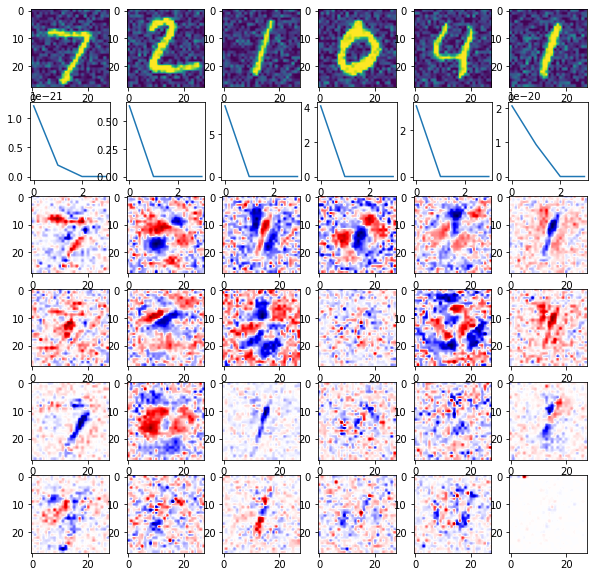

In [ ]:
from tensorflow.keras.models import load_model
# model = load_model('training_mask_2500_images_a=0.6169.h5')
# compare activation similarity
def get_activations(X, model, target_layer, aux_model):
    X = tf.convert_to_tensor(X)
 
    # feed in images and record activations
    print("Retrieving Neuron Activations")
    with tf.GradientTape(persistent=True) as tape:
        # track the input to see how it changes
        tape.watch(X)
        # retrieve output prediction and hidden layer we specified in aux_model
        neuron_activations = aux_model(X)  # eq 1

    neuron_activations = np.array(neuron_activations).reshape(len(X), n_neurons, )

    return neuron_activations

# calc_acc(model, x_test)

# model_normal = get_model()
# optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
# model_normal.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# n = 60000
# model_normal.fit(x_train.reshape(60000, 28, 28, 1), y_train, epochs=1)
# calc_acc(model_normal, x_test.reshape(10000, 28, 28, 1), y_test)
#img = add_noise(img)
batch_size = 1
target_layer = len(model.layers)-1 # 9
n_neurons = model.layers[target_layer].output.shape[-1]
# define a model that lets us get at the internal activations
aux_model = tf.keras.Model(inputs=model.inputs,
                            outputs=[model.layers[target_layer].output[:, i] for i in range(n_neurons)])



# print('u shape', u.shape)
f, axarr = plt.subplots(6, 6, figsize=(10, 10))
for i in range(6):
  img = x_test[i:i+1].reshape(1, 28, 28, 1)
  print("pred'", np.argmax(model(img)))
  # img = img.reshape(1, 784)
  u, s, vh = perform_SVD(img, model, target_layer, aux_model)
  print('U shape before transpose:', u.shape)
  u = u.transpose()
  print('U shape after transpose', u.shape)
  print('s shape', s.shape)
  u = u.transpose()
  u = u[0]
  u = u.transpose()

  for component in u:
    component /= np.max(np.abs(component))
  # img w c comp1/2/3/
  axarr[0, i].imshow(img.reshape(28, 28))
  axarr[1, i].plot(s[0][0:4])
  axarr[2, i].imshow(u[0].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic') # single neuron
  axarr[3, i].imshow(u[1].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic')
  axarr[4, i].imshow(u[2].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic')
  axarr[5, i].imshow(u[3].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic')

  # axarr[i % 8, i // 8].imshow(V[i][0], cmap='seismic') # layer
plt.show()



In [ ]:
unconstrained_model = get_model()
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
print(x_train.shape, y_train.shape)
unconstrained_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
if conv:
  unconstrained_model.fit(x_train.reshape(60000, 28, 28, 1), y_train, epochs=2, batch_size=32)
else:
  unconstrained_model.fit(x_train, y_train, epochs=2, batch_size=32)
calc_acc(unconstrained_model, x_test.reshape(10000, 28, 28, 1), y_test)

(60000, 28, 28) (60000, 10)
Epoch 1/2
1280/1875 [===================>..........] - ETA: 1s - loss: 1.5749 - accuracy: 0.4303

KeyboardInterrupt: ignored

pred' 3
pred'1 1
Retrieving neuron gradients w.r.t. input
Calculated grad_maps of shape: (10, 1, 28, 28, 1)
V shape after transpose before svd (784, 10, 1)
Performing SVD 0 of 1
U shape before returning (1, 784, 10)
(1, 784, 10) (1, 10) (1, 10, 10)
U shape before transpose: (1, 784, 10)
U shape after transpose (10, 784, 1)
s shape (1, 10)
pred2' 3
Retrieving neuron gradients w.r.t. input
Calculated grad_maps of shape: (10, 1, 28, 28, 1)
V shape after transpose before svd (784, 10, 1)
Performing SVD 0 of 1
U shape before returning (1, 784, 10)
(1, 784, 10) (1, 10) (1, 10, 10)
U shape before transpose: (1, 784, 10)
U shape after transpose (10, 784, 1)
s shape (1, 10)
pred3' 2
Retrieving neuron gradients w.r.t. input
Calculated grad_maps of shape: (10, 1, 28, 28, 1)
V shape after transpose before svd (784, 10, 1)
Performing SVD 0 of 1
U shape before returning (1, 784, 10)
(1, 784, 10) (1, 10) (1, 10, 10)
U shape before transpose: (1, 784, 10)
U shape after transpose (10, 784, 1)
s shape (

NameError: ignored

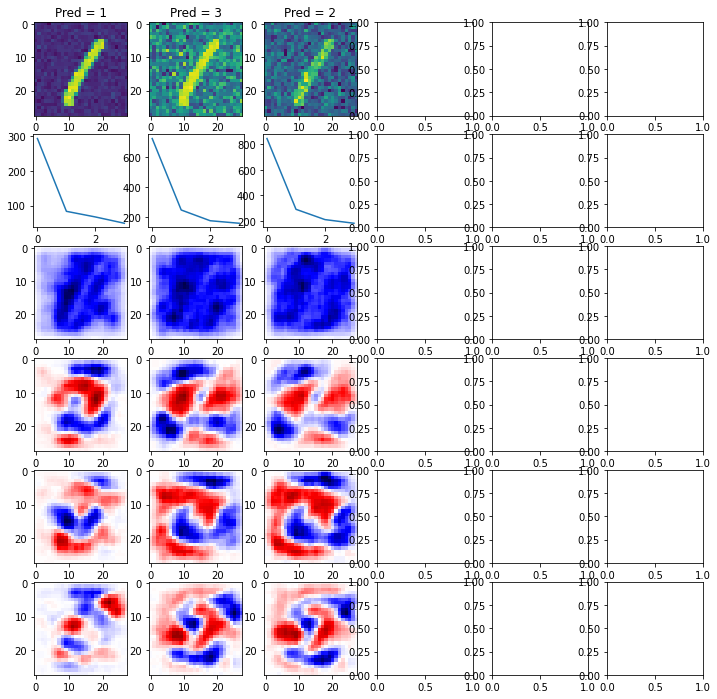

In [ ]:
batch_size = 1
target_layer = 9 # 9
if conv:
  target_layer = 12
n_neurons = model.layers[target_layer].output.shape[-1]
# define a model that lets us get at the internal activations
aux_model = tf.keras.Model(inputs=model.inputs,
                            outputs=[model.layers[target_layer].output[:, i] for i in range(n_neurons)])

img = x_train[0].reshape(1, 28, 28, 1)
print("pred'", np.argmax(model(img)))
x_masks = x_train
# print('u shape', u.shape)
f, axarr = plt.subplots(6, 6, figsize=(12, 12))
for i in range(1):
  img_idx = 3
  img = x_train[img_idx:img_idx+1].reshape(1, 28, 28, 1)
  pred = np.argmax(model(img))

  print("pred'1", pred)
  # img = img.reshape(1, 784)
  u, s, vh = perform_SVD(img, model, target_layer, aux_model)
  print('U shape before transpose:', u.shape)
  u = u.transpose()
  print('U shape after transpose', u.shape)
  print('s shape', s.shape)
  u = u.transpose()
  u = u[0]
  u = u.transpose()

  for component in u:
    component /= np.max(np.abs(component))
  axarr[0, i].imshow(img.reshape(28, 28))
  axarr[0, i].set_title("Pred = %s" % pred)
  axarr[1, i].plot(s[0][0:4])
  axarr[2, i].imshow(u[0].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic') # single neuron
  axarr[3, i].imshow(u[1].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic')
  axarr[4, i].imshow(u[2].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic')
  axarr[5, i].imshow(u[3].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic')
  neg_mask = [1] * 784 - x_masks[img_idx].reshape(784)
  img2 = img + (np.random.normal(0.25, 0.25, img.shape) * np.array(neg_mask).reshape(img.shape))
  pred = np.argmax(model(img2))
  print("pred2'", pred)
  # img = img.reshape(1, 784)
  u, s, vh = perform_SVD(img2, model, target_layer, aux_model)
  print('U shape before transpose:', u.shape)
  u = u.transpose()
  print('U shape after transpose', u.shape)
  print('s shape', s.shape)
  u = u.transpose()
  u = u[0]
  u = u.transpose()

  for component in u:
    component /= np.max(np.abs(component))
  axarr[0, i+1].imshow(img2.reshape(28, 28))
  axarr[0, i+1].set_title("Pred = %s" % pred)

  axarr[1, i+1].plot(s[0][0:4])
  axarr[2, i+1].imshow(u[0].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic') # single neuron
  axarr[3, i+1].imshow(u[1].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic')
  axarr[4, i+1].imshow(u[2].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic')
  axarr[5, i+1].imshow(u[3].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic')

  img3 = img + (np.random.normal(0.25, 0.25, img.shape))
  pred = np.argmax(model(img3))
  print("pred3'", pred)
  # img = img.reshape(1, 784)
  u, s, vh = perform_SVD(img3, model, target_layer, aux_model)
  print('U shape before transpose:', u.shape)
  u = u.transpose()
  print('U shape after transpose', u.shape)
  print('s shape', s.shape)
  u = u.transpose()
  u = u[0]
  u = u.transpose()

  for component in u:
    component /= np.max(np.abs(component))
  axarr[0, i+2].imshow(img3.reshape(28, 28))
  axarr[0, i+2].set_title("Pred = %s" % pred)

  axarr[1, i+2].plot(s[0][0:4])
  axarr[2, i+2].imshow(u[0].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic') # single neuron
  axarr[3, i+2].imshow(u[1].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic')
  axarr[4, i+2].imshow(u[2].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic')
  axarr[5, i+2].imshow(u[3].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic')

  img4 = img 
  pred = np.argmax(model(img4))
  print("pred4'", pred)
  # img = img.reshape(1, 784)
  un_aux_model = tf.keras.Model(inputs=unconstrained_model.inputs,
                            outputs=[unconstrained_model.layers[target_layer].output[:, i] for i in range(n_neurons)])

  u, s, vh = perform_SVD(img4, unconstrained_model, target_layer, un_aux_model)
  print('U shape before transpose:', u.shape)
  u = u.transpose()
  print('U shape after transpose', u.shape)
  print('s shape', s.shape)
  u = u.transpose()
  u = u[0]
  u = u.transpose()

  for component in u:
    component /= np.max(np.abs(component))
  axarr[0, i+3].imshow(img4.reshape(28, 28))
  axarr[0, i+3].set_title("Pred = %s" % pred)
  axarr[1, i+3].plot(s[0][0:4])
  axarr[2, i+3].imshow(u[0].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic') # single neuron
  axarr[3, i+3].imshow(u[1].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic')
  axarr[4, i+3].imshow(u[2].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic')
  axarr[5, i+3].imshow(u[3].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic')

  img5 = img2
  pred = np.argmax(model(img4))
  print("pred5'", pred)
  # img = img.reshape(1, 784)
  u, s, vh = perform_SVD(img2, unconstrained_model, target_layer, un_aux_model)
  print('U shape before transpose:', u.shape)
  u = u.transpose()
  print('U shape after transpose', u.shape)
  print('s shape', s.shape)
  u = u.transpose()
  u = u[0]
  u = u.transpose()

  for component in u:
    component /= np.max(np.abs(component))
  axarr[0, i+4].imshow(img5.reshape(28, 28))
  axarr[0, i+4].set_title("Pred = %s" % pred)
  axarr[1, i+4].plot(s[0][0:4])
  axarr[2, i+4].imshow(u[0].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic') # single neuron
  axarr[3, i+4].imshow(u[1].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic')
  axarr[4, i+4].imshow(u[2].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic')
  axarr[5, i+4].imshow(u[3].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic')

  img6 = img3
  pred = np.argmax(model(img3))
  print("pred6'", pred)
  # img = img.reshape(1, 784)
  u, s, vh = perform_SVD(img3, unconstrained_model, target_layer, un_aux_model)
  print('U shape before transpose:', u.shape)
  u = u.transpose()
  print('U shape after transpose', u.shape)
  print('s shape', s.shape)
  u = u.transpose()
  u = u[0]
  u = u.transpose()

  for component in u:
    component /= np.max(np.abs(component))
  axarr[0, i+5].imshow(img3.reshape(28, 28))
  axarr[0, i+5].set_title("Pred = %s" % pred)
  axarr[1, i+5].plot(s[0][0:4])
  axarr[2, i+5].imshow(u[0].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic') # single neuron
  axarr[3, i+5].imshow(u[1].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic')
  axarr[4, i+5].imshow(u[2].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic')
  axarr[5, i+5].imshow(u[3].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic')
  # for x in range(6):
  #   for y in range(6):
  #     axarr[x,y].axis('off')
  # axarr[i % 8, i // 8].imshow(V[i][0], cmap='seismic') # layer
plt.show()

# img = u[0].reshape(28, 28)

# plt.imshow(img, vmin=-1, vmax=1, cmap='seismic')
# plt.title("Digit: 2, Component:0")
# plt.show()

# img = u[1].reshape(28, 28)

# plt.imshow(img, vmin=-1, vmax=1, cmap='seismic')
# plt.title("Digit: 2, Component:1")
# plt.show()

# img = u[2].reshape(28, 28)

# plt.imshow(img, vmin=-1, vmax=1, cmap='seismic')
# plt.title("Digit: 2, Component:2")
# plt.show()


# Testing Dotloss constrained models against noise

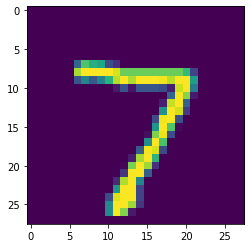

In [ ]:
# noise experiments
img = x_test[0]

plt.imshow(img)
plt.show()

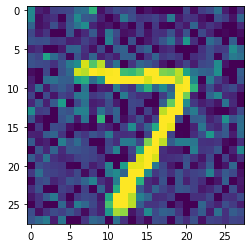

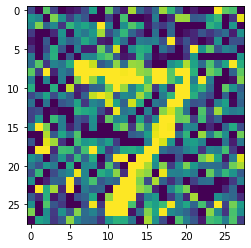

In [ ]:
img_15 = img.copy()
mu = 0.15
sigma = 0.15
img_15 += np.random.normal(mu, sigma, img_15.shape)
img_15 = np.clip(img_15, 0, 1)
plt.imshow(img_15.reshape(28,28))
plt.show()

img_35 = img.copy()
mu = 0.35
sigma = 0.35
img_35 += np.random.normal(mu, sigma, img_35.shape)
img_35 = np.clip(img_35, 0, 1)
plt.imshow(img_35.reshape(28,28))
plt.show()

Interpreting noisy inputs

7
7
7
Retrieving neuron gradients w.r.t. input
Calculated grad_maps of shape: (10, 1, 28, 28)
V shape after transpose before svd (784, 10, 1)
Performing SVD 0 of 1
U shape before returning (1, 784, 10)
(1, 784, 10) (1, 10) (1, 10, 10)
Retrieving neuron gradients w.r.t. input
Calculated grad_maps of shape: (10, 1, 28, 28)
V shape after transpose before svd (784, 10, 1)
Performing SVD 0 of 1
U shape before returning (1, 784, 10)
(1, 784, 10) (1, 10) (1, 10, 10)
Retrieving neuron gradients w.r.t. input
Calculated grad_maps of shape: (10, 1, 28, 28)
V shape after transpose before svd (784, 10, 1)
Performing SVD 0 of 1
U shape before returning (1, 784, 10)
(1, 784, 10) (1, 10) (1, 10, 10)
Retrieving neuron gradients w.r.t. input
Calculated grad_maps of shape: (10, 1, 28, 28)
V shape after transpose before svd (784, 10, 1)
Performing SVD 0 of 1
U shape before returning (1, 784, 10)
(1, 784, 10) (1, 10) (1, 10, 10)
Retrieving neuron gradients w.r.t. input
Calculated grad_maps of shape: (10, 1

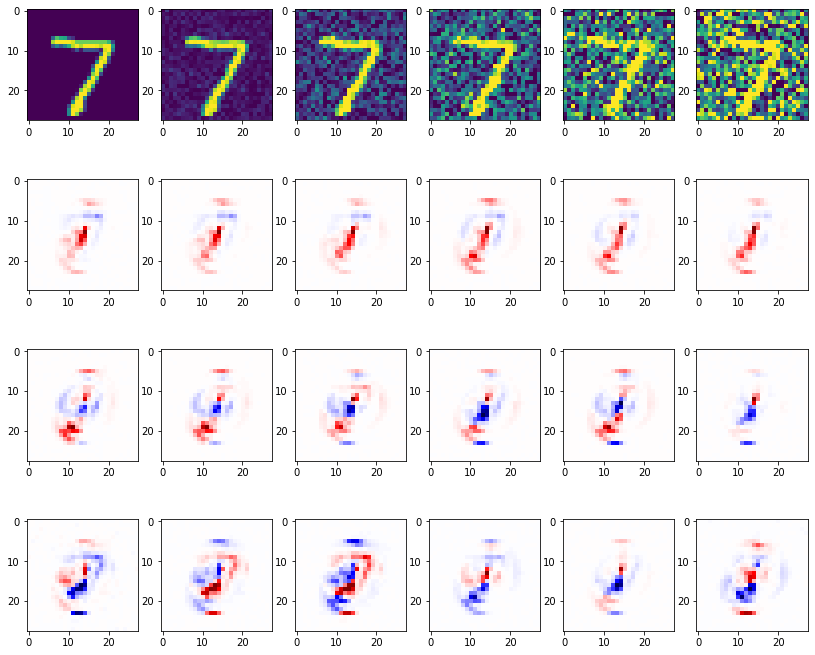

In [ ]:
print(np.argmax(model.predict(img.reshape(1,28,28))))
print(np.argmax(model.predict(img_15.reshape(1,28,28))))
print(np.argmax(model.predict(img_35.reshape(1,28,28))))
images = np.array([img, imgs_05[0], imgs_15[0], imgs_25[0], imgs_35[0], imgs_45[0]])
# u, s, vh = perform_SVD(img, model, target_layer, aux_model)
f, axarr = plt.subplots(4, 6, figsize=(14, 12))
for i in range(6):
  input = images[i:i+1]
  # pred = np.argmax(model(input))

  # print("pred'1", pred)
  # img = img.reshape(1, 784)
  u, s, vh = perform_SVD(input, model, target_layer, aux_model)
  # print('U shape before transpose:', u.shape)
  u = u.transpose()
  # print('U shape after transpose', u.shape)
  # print('s shape', s.shape)
  u = u.transpose()
  u = u[0]
  u = u.transpose()

  for component in u:
    component /= np.max(np.abs(component))
  axarr[0, i].imshow(input.reshape(28, 28))
  # axarr[1, i].plot(s[0][0:4])
  axarr[1, i].imshow(u[0].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic') # single neuron
  axarr[2, i].imshow(u[1].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic')
  axarr[3, i].imshow(u[2].reshape(28, 28), vmin=-1, vmax=1, cmap='seismic')

  # axarr[i,0].set_(ticks=None)
  # plt.yticks(ticks=None)
plt.show()

Now to test on whole data set accuracy

In [ ]:
imgs_05 = x_test.copy()
mu = 0.05
sigma = 0.05
imgs_05 += np.random.normal(mu, sigma, imgs_05.shape)
imgs_05 = np.clip(imgs_05, 0, 1)

imgs_15 = x_test.copy()
mu = 0.15
sigma = 0.15
imgs_15 += np.random.normal(mu, sigma, imgs_15.shape)
imgs_15 = np.clip(imgs_15, 0, 1)

imgs_25 = x_test.copy()
mu = 0.25
sigma = 0.25
imgs_25 += np.random.normal(mu, sigma, imgs_25.shape)
imgs_25 = np.clip(imgs_25, 0, 1)

imgs_35 = x_test.copy()
mu = 0.35
sigma = 0.35
imgs_35 += np.random.normal(mu, sigma, imgs_35.shape)
imgs_35 = np.clip(imgs_35, 0, 1)

imgs_45 = x_test.copy()
mu = 0.45
sigma = 0.45
imgs_45 += np.random.normal(mu, sigma, imgs_45.shape)
imgs_45 = np.clip(imgs_45, 0, 1)

In [ ]:
print('constrained')
print('clean')
calc_acc(model, x_test, y_test)
print('05')
calc_acc(model, imgs_05, y_test)
print('15')
calc_acc(model, imgs_15, y_test)
print('25')
calc_acc(model, imgs_25, y_test)
print('35')
calc_acc(model, imgs_35, y_test)
print('45')
calc_acc(model, imgs_45, y_test)

print('unconstrained')
print('clean')
calc_acc(unconstrained_model, x_test, y_test)
print('05')
calc_acc(unconstrained_model, imgs_05, y_test)
print('15')
calc_acc(unconstrained_model, imgs_15, y_test)
print('25')
calc_acc(unconstrained_model, imgs_25, y_test)
print('35')
calc_acc(unconstrained_model, imgs_35, y_test)
print('45')
calc_acc(unconstrained_model, imgs_45, y_test)

constrained
clean
Acc: 7275 of 10000
05
Acc: 7078 of 10000
15
Acc: 6494 of 10000
25
Acc: 5230 of 10000
35
Acc: 3605 of 10000
45
Acc: 2582 of 10000
unconstrained
clean
Acc: 9497 of 10000
05
Acc: 9287 of 10000
15
Acc: 6016 of 10000
25
Acc: 3733 of 10000
35
Acc: 2233 of 10000
45
Acc: 1487 of 10000


0.1487

Noise testing (OLD)

In [ ]:
if conv:
  x_test = x_test.reshape(10000, 28, 28, 1)
noise_level = 0.15
print('Noise level:', noise_level)
print("Unconstrained clean")
unconstrained_model.evaluate(x_test, y_test)
print("constrained clean")
model.evaluate(x_test, y_test)
x_test_noisy = x_test + np.random.normal(noise_level, noise_level, x_test.shape)
print("Unconstrained noise", noise_level)
unconstrained_model.evaluate(x_test_noisy, y_test)
print("constrained noise", noise_level)
model.evaluate(x_test_noisy, y_test)
# x_test_masks = x_test
print(print("masked noise"))
x_test_noisy_masked = x_test + (np.random.normal(noise_level, noise_level, x_test.shape) * np.array(x_test_masks).reshape(x_test.shape))
print("Unconstrained")
unconstrained_model.evaluate(x_test_noisy, y_test)
print("constrained")
model.evaluate(x_test_noisy, y_test)
print("")
noise_level = 0.25
print('Noise level:', noise_level)
print("Unconstrained noise", noise_level)
x_test_noisy = x_test + np.random.normal(noise_level, noise_level, x_test.shape)
unconstrained_model.evaluate(x_test_noisy, y_test)
print("constrained noise", noise_level)

model.evaluate(x_test_noisy, y_test)
x_test_noisy_masked = x_test + (np.random.normal(noise_level, noise_level, x_test.shape) * np.array(x_test_masks).reshape(x_test.shape))
print("constrained mask noise", noise_level)

unconstrained_model.evaluate(x_test_noisy_masked, y_test)
print("constrained mask noise", noise_level)

model.evaluate(x_test_noisy_masked, y_test)

noise_level = 0.45
print('Noise level:', noise_level)
print("Unconstrained noise", noise_level)

x_test_noisy = x_test + np.random.normal(noise_level, noise_level, x_test.shape)
unconstrained_model.evaluate(x_test_noisy, y_test)
print("constrained noise", noise_level)

model.evaluate(x_test_noisy, y_test)
x_test_noisy_masked = x_test + (np.random.normal(noise_level, noise_level, x_test.shape) * np.array(x_test_masks).reshape(x_test.shape))
print("Unconstrained mask noise", noise_level)

unconstrained_model.evaluate(x_test_noisy_masked, y_test)
print("constrained mask noise", noise_level)

model.evaluate(x_test_noisy_masked, y_test)

noise_level = 0.65
print('Noise level:', noise_level)
x_test_noisy = x_test + np.random.normal(noise_level, noise_level, x_test.shape)
print("Unconstrained noise", noise_level)

unconstrained_model.evaluate(x_test_noisy, y_test)
print("constrained noise", noise_level)

model.evaluate(x_test_noisy, y_test)
x_test_noisy_masked = x_test + (np.random.normal(noise_level, noise_level, x_test.shape) * np.array(x_test_masks).reshape(x_test.shape))
print("Unconstrained mask noise", noise_level)

unconstrained_model.evaluate(x_test_noisy_masked, y_test)
print("constrained mask noise", noise_level)

model.evaluate(x_test_noisy_masked, y_test)



Noise level: 0.15
Unconstrained clean
313/313 [==============================] - 1s 2ms/step - loss: 0.1464 - accuracy: 0.9561
constrained clean
313/313 [==============================] - 1s 2ms/step - loss: 0.3526 - accuracy: 0.8941
Unconstrained noise 0.15
313/313 [==============================] - 1s 2ms/step - loss: 0.3014 - accuracy: 0.9046
constrained noise 0.15
313/313 [==============================] - 1s 2ms/step - loss: 0.4032 - accuracy: 0.8810
masked noise
None
Unconstrained
313/313 [==============================] - 1s 2ms/step - loss: 0.3014 - accuracy: 0.9046
constrained
313/313 [==============================] - 1s 2ms/step - loss: 0.4032 - accuracy: 0.8810

Noise level: 0.25
Unconstrained noise 0.25
313/313 [==============================] - 1s 2ms/step - loss: 0.5892 - accuracy: 0.8104
constrained noise 0.25
313/313 [==============================] - 1s 2ms/step - loss: 0.4846 - accuracy: 0.8497
constrained mask noise 0.25
313/313 [==============================] - 1s

[0.4811354875564575, 0.868399977684021]